In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

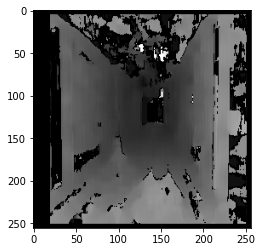

In [34]:
imgL = cv.imread('corridorl.jpg',0)
imgR = cv.imread('corridorr.jpg',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=11)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

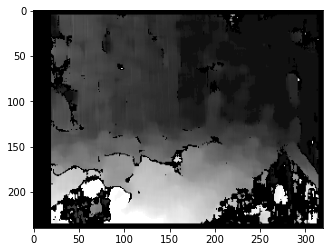

In [40]:
imgL = cv.imread('triclopsi2l.jpg',0)
imgR = cv.imread('triclopsi2r.jpg',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=11)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

In [37]:
imgL.shape

(240, 320)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


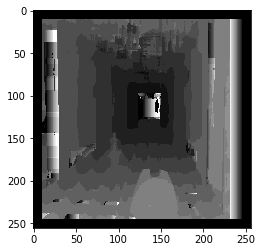

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


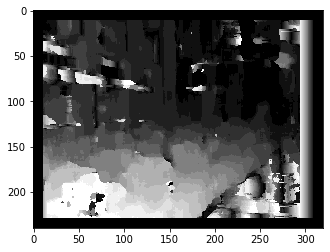

In [54]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



BLOCK_SIZE = 11
SEARCH_BLOCK_SIZE = 16

def read_image_pair(left_img, right_img):
    imgL = cv2.imread(left_img, 0)
    imgR = cv2.imread(right_img, 0)

    imgL_arr = np.asarray(imgL)
    imgR_arr = np.asarray(imgR)
    return imgL_arr, imgR_arr

def sum_of_abs_diff(pixel_vals_1, pixel_vals_2):
    if pixel_vals_1.shape != pixel_vals_2.shape:
        return -1

    return np.sum(abs(pixel_vals_1 - pixel_vals_2))


def compare_blocks(y, x, block_left, right_array, block_size=5):
    # Get search range for the right image
    x_min = max(0, x - SEARCH_BLOCK_SIZE)
    x_max = min(right_array.shape[1], x + SEARCH_BLOCK_SIZE)
    #print(f'search bounding box: ({y, x_min}, ({y, x_max}))')
    first = True
    min_sad = None
    min_index = None
    for x in range(x_min, x_max):
        block_right = right_array[y: y+block_size,
                                  x: x+block_size]
        sad = sum_of_abs_diff(block_left, block_right)
        #print(f'sad: {sad}, {y, x}')
        if first:
            min_sad = sad
            min_index = (y, x)
            first = False
        else:
            if sad < min_sad:
                min_sad = sad
                min_index = (y, x)

    return min_index


def right_image_block(x, y, right_img):
    imgL_arr, imgR_arr = read_image_pair(left_img, right_img)
    imgR = cv2.imread("right_img", 0)
    x_min = max(0, x - 50)
    x_max = min(imgR_arr.shape[1], x + 25)
    right_im_bbox = cv2.rectangle(imgR, (x_min, y),
                                  (x_max, y + 25),
                                  (0, 0, 255), 2)
    display_image(right_im_bbox, window_name='right')


def get_disparity_map():
    left_array, right_array = read_image_pair(left_img, right_img)
    left_array = left_array.astype(int)
    right_array = right_array.astype(int)
    if left_array.shape != right_array.shape:
        raise "Left-Right image shape mismatch!"
    h, w = left_array.shape
    # left_im = cv2.imread("data/left.png", 0)
    disparity_map = np.zeros((h, w))
    # Go over each pixel position
    for y in range(BLOCK_SIZE, h-BLOCK_SIZE):
        for x in range(BLOCK_SIZE, w-BLOCK_SIZE):
            block_left = left_array[y:y + BLOCK_SIZE,
                                    x:x + BLOCK_SIZE]
            min_index = compare_blocks(y, x, block_left,
                                       right_array,
                                       block_size=BLOCK_SIZE)
            disparity_map[y, x] = abs(min_index[1] - x)
            # Debug section to visualize the blocks on the image
            # left_im_bbox = cv2.rectangle(left_im, (x, y),
            #                              (x + 25, y + 25),
            #                              (0, 0, 255), 2)
            # display_image(left_im_bbox, window_name='left')
            # print(left_array[y:y+25, x:x+25])
            # right_image_block(x, y)

    print(disparity_map)
    plt.imshow(disparity_map, cmap='gray', interpolation='nearest')
    plt.savefig('depth_image.png')
    plt.show()
    # img = Image.fromarray(disparity_map, 'L')
    # img.show()


if __name__ == '__main__':
    images = [["corridorl.jpg", "corridorr.jpg"], ['triclopsi2l.jpg','triclopsi2r.jpg']]
    for img_pair in images:
        left_img = img_pair[0]
        right_img = img_pair[1]
        get_disparity_map()
